In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
x=np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y=np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])
# \beta
Beta = 4   

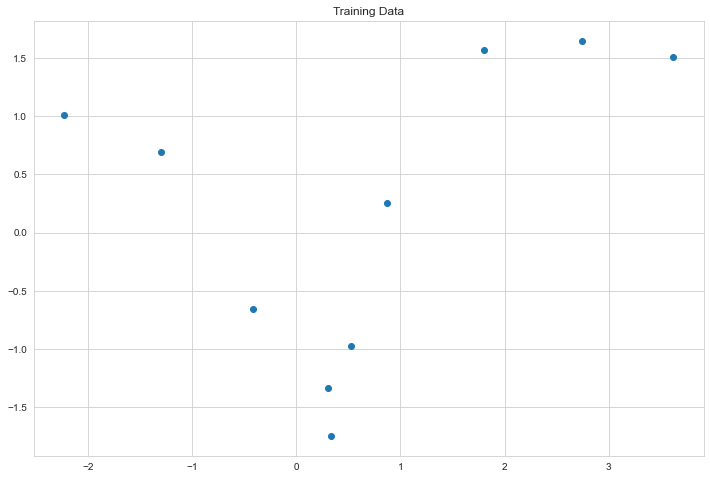

In [3]:
# Ploting the training data
sns.set_style('whitegrid')
matplotlib.rcParams["figure.figsize"] = [12,8]
plt.scatter(x, y)
plt.title("Training Data")
plt.show()

In [4]:
def phi(k,x):
    return np.array([x**i for i in range(k+1)]).T

In [5]:
def posterior(X,Beta,y):
    mean=np.linalg.inv(X.T.dot(X)+Beta**(-1)*np.identity(X.shape[1])).dot(X.T).dot(y)
    cov=Beta**(-1)*np.linalg.inv(X.T.dot(X)+Beta**(-1)*np.identity(X.shape[1]))
    return mean,cov

10 samples from the posterior distribution for k= 1 are [[-0.11324109  0.47602941]
 [ 0.19463178  0.23139723]
 [-0.10374649  0.38948665]
 [ 0.18916391  0.12133882]
 [-0.13814038  0.4317933 ]
 [-0.15907904  0.2651212 ]
 [ 0.310474    0.12590025]
 [ 0.22244336  0.14689977]
 [ 0.07125955  0.1632379 ]
 [ 0.01227591  0.19646236]]


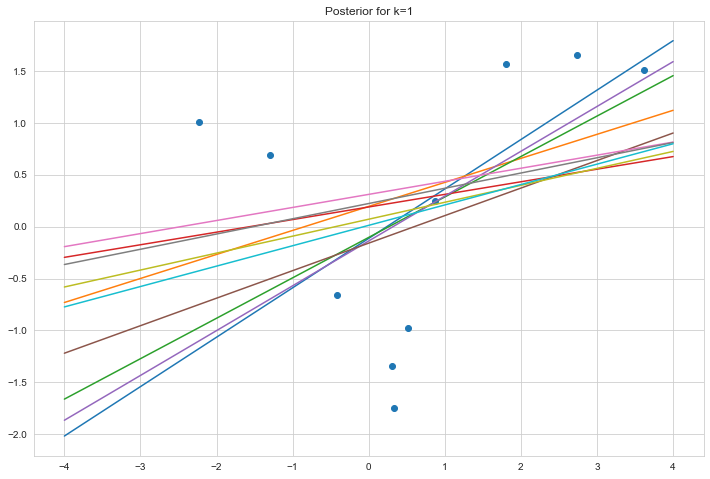

10 samples from the posterior distribution for k= 2 are [[-0.62139813 -0.08922682  0.24276029]
 [-0.58099212 -0.06592036  0.28917783]
 [-0.59463399 -0.28217765  0.29241895]
 [-0.89759576  0.08207879  0.20395774]
 [-0.37141288 -0.26398607  0.30652497]
 [-0.26141958 -0.06000895  0.20732083]
 [-0.25261662 -0.2182978   0.22397914]
 [-0.66962895 -0.04299838  0.22886551]
 [-0.20782419 -0.08745623  0.26004764]
 [-0.26127456 -0.3656682   0.25288893]]


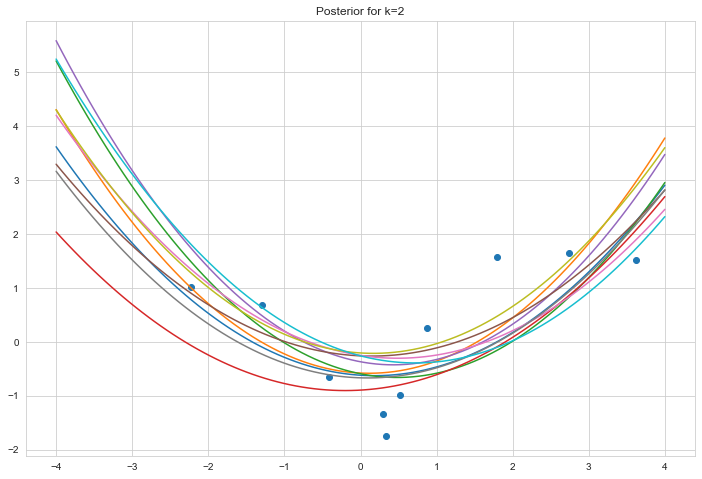

10 samples from the posterior distribution for k= 3 are [[-0.79510194  0.42049854  0.41778755 -0.0923851 ]
 [-0.71377697  0.34167846  0.46754193 -0.10150316]
 [-0.74828191  0.32821209  0.47148709 -0.09684652]
 [-0.87477648  0.41947888  0.40765958 -0.09024916]
 [-0.71161161  0.5109264   0.43662057 -0.09242214]
 [-1.08370685  0.64830745  0.59745261 -0.15900578]
 [-0.34912415  0.1560112   0.32502545 -0.06865222]
 [-1.14332449  0.62688049  0.64772213 -0.1862868 ]
 [-0.54506205  0.24912465  0.29610822 -0.05582526]
 [-0.73958388  0.46904422  0.4921442  -0.11101514]]


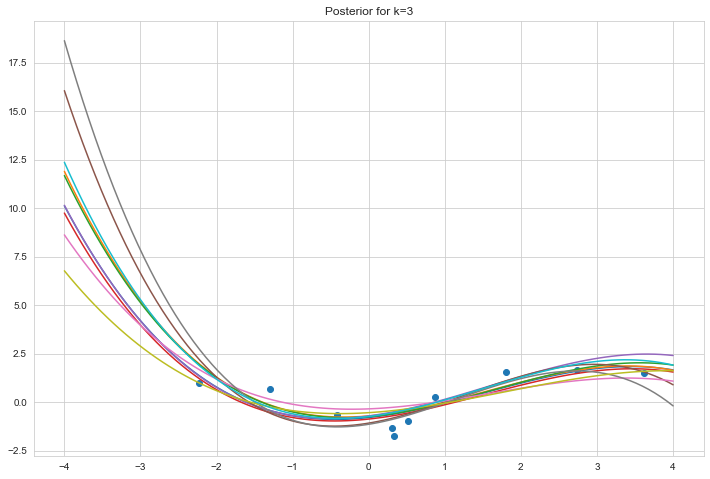

10 samples from the posterior distribution for k= 4 are [[-0.82009623 -0.32009957  0.77766921  0.07883687 -0.0608541 ]
 [-1.11061364  0.37039777  0.77638367 -0.01968061 -0.04792916]
 [-0.89666367  0.34600922  0.53045207 -0.09210461 -0.0089007 ]
 [-1.42493757  0.42662187  0.83171974 -0.09431634 -0.02842239]
 [-1.02964425  0.088466    0.56340209  0.01586462 -0.03359008]
 [-1.11443159 -0.30862113  0.76279111  0.0986414  -0.06320518]
 [-0.59991048  0.17922698  0.58569908 -0.04121714 -0.03159993]
 [-0.83345745 -0.21728787  0.57945722  0.03346996 -0.03131153]
 [-0.81512773 -0.14069786  0.61085583  0.01088256 -0.02976861]
 [-0.53707877 -0.52753055  0.58078883  0.11861897 -0.04955163]]


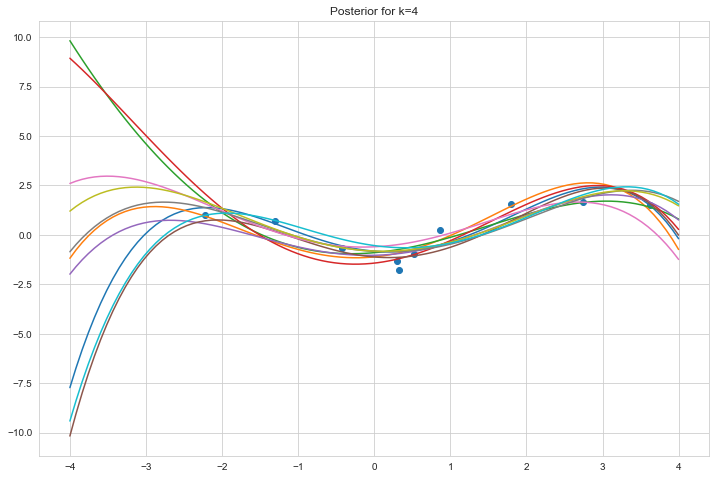

In [6]:
#Part 1
for k in range(1,5):
    X=phi(k,x)
    mean,cov=posterior(X,Beta,y)
    W_samples=np.random.multivariate_normal(mean,cov,10)
    print("10 samples from the posterior distribution for k=",k,"are",W_samples)
    plt.scatter(x, y)
    x_plot=np.linspace(-4,4,100) #for plotting the curve
    for w in W_samples:
        plt.plot(x_plot,np.dot(phi(k,x_plot),w)) 
    plt.title("Posterior for k="+str(k))
    plt.show()

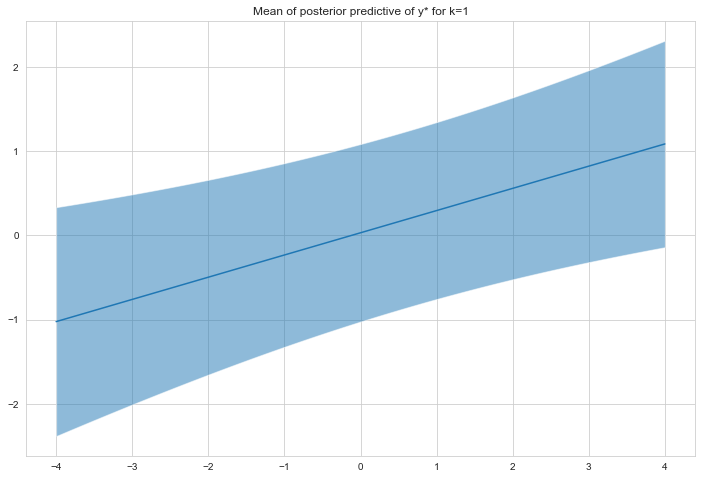

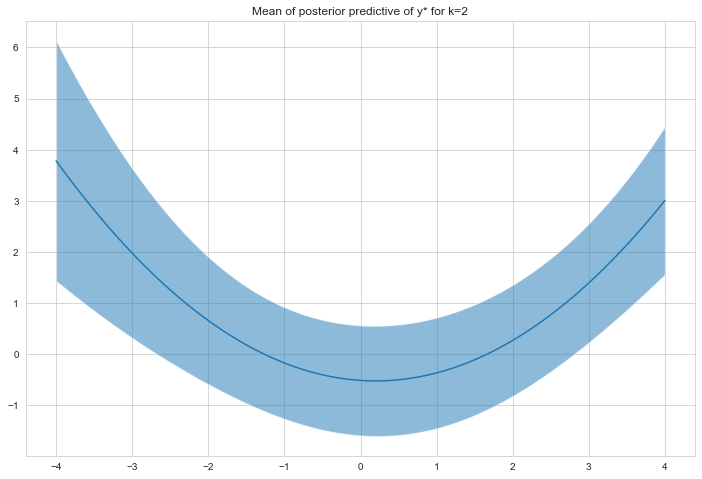

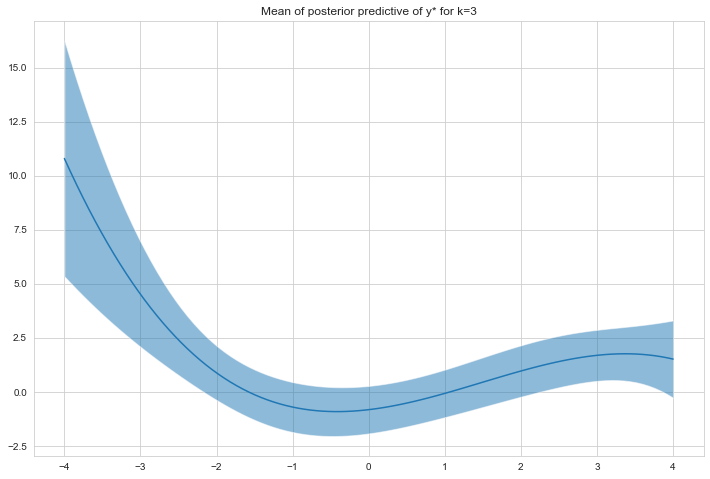

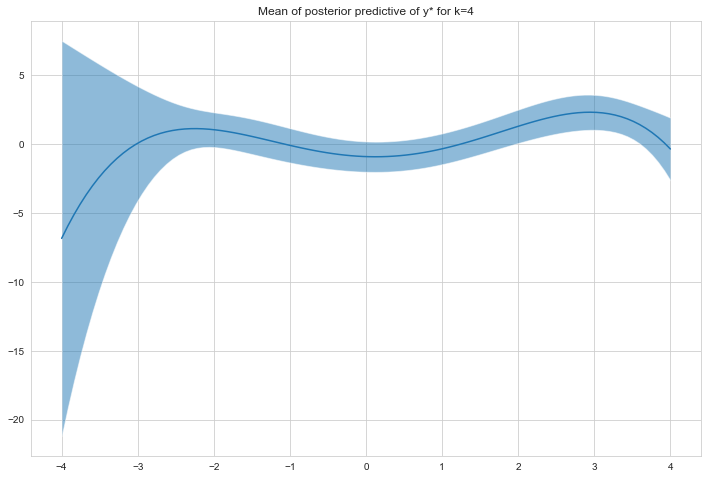

In [7]:
#Part 2
for k in range(1,5):
    X=phi(k,x)
    X_star=phi(k,np.linspace(-4,4,100))
    mean,cov=posterior(X,Beta,y)
    mean_star=X_star.dot(mean)
    cov_star=(Beta**(-1)+X_star.dot(cov).dot(X_star.T)).diagonal()
    plt.plot(np.linspace(-4,4,100), mean_star) # plotting the mean of posterior predictive
    plt.fill_between(np.linspace(-4,4,100), mean_star + 2*np.sqrt(cov_star), mean_star - 2*np.sqrt(cov_star), alpha=0.5)
    # plotting the +- 2*std_dev
    plt.title('Mean of posterior predictive of y* for k=' + str(k))
    plt.show()

In [8]:
#Part 3
for k in range(1,5):
    X = phi(k, x)
    marginal_likelihood = np.log(multivariate_normal.pdf(y, mean=np.zeros(len(x)), cov=((1/Beta)*np.eye(len(x)) + X.dot(X.T))))
    print('For k =', k, 'Log marginal likelihood =', marginal_likelihood)
# k=3 is the best model

For k = 1 Log marginal likelihood = -32.352015280445244
For k = 2 Log marginal likelihood = -22.772153178782254
For k = 3 Log marginal likelihood = -22.079070642241824
For k = 4 Log marginal likelihood = -22.38677618035549


In [9]:
#Part 4
for k in range(1,5):
    X=phi(k,x)
    mean,cov=posterior(X,Beta,y)
    #For normal distribution, mean=mode thus w_map=mean
    w_map=mean
    likelihood=np.log(multivariate_normal.pdf(y, mean=X.dot(w_map), cov=(1/Beta)*np.eye(len(x))))
    print('For k =', k, 'Log likelihood =', likelihood)


For k = 1 Log likelihood = -28.094004379075553
For k = 2 Log likelihood = -15.360663659052214
For k = 3 Log likelihood = -10.935846883615739
For k = 4 Log likelihood = -7.225291259028602
